In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
milk = pd.read_csv("milk.csv",index_col=0)
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [3]:
scaler = StandardScaler().set_output(transform='pandas')
scaler.fit(milk)
milkscaled=scaler.transform(milk)

In [4]:
pca = PCA().set_output(transform='pandas')
principalComponents = pca.fit_transform(milkscaled)
### PCA columns are orthogonal to each other
principalComponents.corr()

,pca0,pca1,pca2,pca3,pca4
pca0,1.000000e+00,1.148957e-16,4.710035e-17,-4.308998e-17,0.000000e+00
pca1,1.148957e-16,1.000000e+00,1.247314e-16,9.008773e-17,1.187218e-16
pca2,4.710035e-17,1.247314e-16,1.000000e+00,-7.878519e-17,-6.813631e-17
pca3,-4.308998e-17,9.008773e-17,-7.878519e-17,1.000000e+00,2.448868e-16
pca4,0.000000e+00,1.187218e-16,-6.813631e-17,2.448868e-16,1.000000e+00


In [5]:
print(principalComponents.var())
## Variances of PC columns are eigen values of 
## var-cov matrix
values, vectors = np.linalg.eig(milkscaled.cov())

pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64


In [6]:
print(pca.explained_variance_)
tot_var = np.sum(pca.explained_variance_)
print(pca.explained_variance_/tot_var)
# or
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_ * 100) 

[4.0404117  0.92437238 0.13429088 0.1026886  0.00656977]
[0.77575905 0.1774795  0.02578385 0.01971621 0.0012614 ]
[0.77575905 0.1774795  0.02578385 0.01971621 0.0012614 ]
[77.57590469 17.74794969  2.57838496  1.97162103  0.12613963]


In [7]:
print(np.cumsum(pca.explained_variance_ratio_ * 100)) 

[ 77.57590469  95.32385438  97.90223934  99.87386037 100.        ]


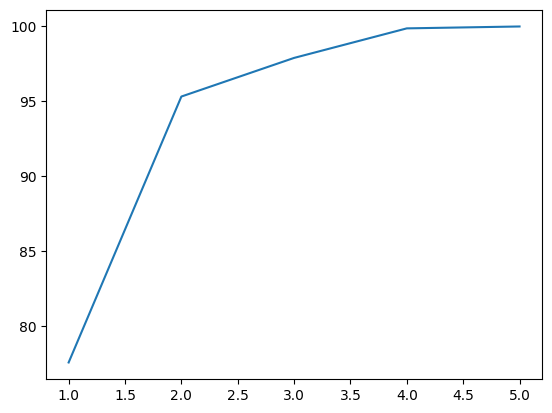

In [8]:
ys = np.cumsum(pca.explained_variance_ratio_ * 100)
xs = np.arange(1,6)
plt.plot(xs,ys)
plt.show()